In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
!pip install -U fbprophet

     |████████████████████████████████| 61kB 488kB/s eta 0:00:01
     |████████████████████████████████| 67.3MB 2.7kB/s eta 0:00:01     |██████████                      | 21.1MB 1.7MB/s eta 0:00:28     |██████████▏                     | 21.3MB 1.7MB/s eta 0:00:28     |████████████▉                   | 26.9MB 843kB/s eta 0:00:48     |█████████████▍                  | 28.2MB 1.4MB/s eta 0:00:29     |███████████████                 | 31.5MB 1.7MB/s eta 0:00:22     |███████████████                 | 31.7MB 1.7MB/s eta 0:00:22     |███████████████████             | 39.8MB 552kB/s eta 0:00:50��███▋          | 45.3MB 215kB/s eta 0:01:43     |██████████████████████▏         | 46.6MB 115kB/s eta 0:03:00████████████████▋         | 47.5MB 848kB/s eta 0:00:24     |█████████████████████████▌      | 53.6MB 9.7MB/s eta 0:00:02�████████████▉      | 54.2MB 9.7MB/s eta 0:00:02████████████████████████▌     | 55.7MB 1.4MB/s eta 0:00:09�█████████████▊     | 56.1MB 1.4MB/s eta 0:00:080:51kB/s eta 0:00:49�██

  Created wheel for holidays: filename=holidays-0.10.3-cp36-none-any.whl size=122267 sha256=8606e703c0ce14c1c1758419811d93d50621869f4b75df4d53885882456b3400
  Stored in directory: /home/nbuser/.cache/pip/wheels/d3/a6/3c/4072c36c7d443be579c0917845e1b27fc1f09d4867c41e170d
  Created wheel for pymeeus: filename=PyMeeus-0.3.7-cp36-none-any.whl size=691115 sha256=6245645ea4365199e0aad73107dce490373e78b17703c001b04b1e7d06908361
  Stored in directory: /home/nbuser/.cache/pip/wheels/8d/1a/e7/684cd77a99aac294f976db834fe613b5424f7c4d75ffb0b84d
Successfully built holidays pymeeus
Failed to build fbprophet
    Running setup.py install for fbprophet ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from fbprophet import Prophet

In [4]:
bmarks = pd.read_excel("Copy of medm 2707.xlsx")

In [5]:
bmarks.columns

Index(['Benchmark Id', 'Internal Bmk Code (SLI)', 'Benchmark Name',
       'Benchmark Description', 'SDS Benchmark Id', 'Supplier Code',
       'Vendor Bmk Code', 'Supplier Benchmark Name',
       'Data Owner (Index Calculator)', 'Index Vendor Code',
       'Benchmark Entity', 'Benchmark Asset Class', 'Instrument Code Column',
       'Benchmark Change Rule', 'Iso Currency Code',
       'Nominal Adjustment Factor', 'Classification Scheme Code',
       'MCap in BMk Curr', 'Constituent Active', 'Active Record', 'Lagged',
       'In Client Reports', 'In APT', 'Deriv Component', 'BBW Only',
       'Static (BBW)', 'Drifted (BBW)', 'UBS Delta Feed', 'Carve Out',
       'Rsm Hedged', 'Rsm Hedged To Id', 'Inserted Date', 'Updated Date',
       'Changed By', 'TS Active', 'TS FactSet ID', 'TS File Prefix', 'TS Code',
       'TS Name', 'TS File Name', 'TS Cash Bmk', 'TS ISO Curr', 'FI Export',
       'FI Sector Feed ID', 'FI Sector Description', 'FI Field Id',
       'Benchmark Change Date', 'Comm

In [6]:
bmarks_sorted = bmarks.sort_values('Inserted Date')

In [7]:
bmarks_sorted

Benchmark Id Internal Bmk Code (SLI)                  Benchmark Name  \
0             133              2224_BLEND               Fund 2224 Blended   
11            274              TSOP_BLEND               Fund TSOP Blended   
9             220                F9_BLEND                 F9 Fund Blended   
8             218                RE_BLEND                 Fund RE Blended   
7             217                FP_BLEND                 FP Fund Blended   
6             215          2224CORP_BLEND  Fund 2224 (Corporates) Blended   
10            271              2223_BLEND          2223 Blended Benchmark   
4             146              U223_BLEND               U223 Fund Blended   
3             143                IC_BLEND                 Fund IC Blended   
2             141                G8_BLEND    50% FTBG AS/50% ML GBP NG AS   
1             140                FV_BLEND                 FV Fund Blended   
5             212              44MC_BLEND       Fund 44 & MC Fund Blended   
12            277              F6V2_BLEND            Fund F6 Blended (v2)   
13            284              TPWG_BLEND               Fund TPWG Blended   
14            299             TPWGG_BLEND           Fund TPWG Gilts Blend   
15            300             TPWGI_BLEND    Fund TPWG Index Linked Blend   
16            301             TPWDG_BLEND           Fund TPWD Gilts Blend   
17            303              XEMD_BLEND     Fund XEMD TEMD SEDU Blended   
18            319            FALCON_BLEND             FUND FALCON BLENDED   
19            322            2264V2_BLEND                    Blend 2264V2   
20            323            2265V2_BLEND                    Blend 2265V2   
21            335          FUNDXSDG_BLEND                        FUNDXSDG   
22            343            XQ3ZV2_BLEND             Fund XQ3ZV2 Blended   
23            345              NWEM_BLEND                      Blend NWEM   
24            350           TPWDGXX_BLEND        XX Fund TPWD Gilts Blend   
25            351            TPWGXX_BLEND              XX Fund TPWG Blend   
26            352           TPWGGXX_BLEND        XX Fund TPWG Gilts Blend   
27            359              5PIR_BLEND                 Fund 5PIR Blend   
79            460          TB03I_XX_BLEND           XX Fund TB03 IL Blend   
78            459           TB03_XX_BLEND              XX Fund TB03 Blend   
..            ...                     ...                             ...   
666           901                 ICEQ35A    ICE BofAML Q35A Custom Index   
667           902           AT81_AL_BLEND       Fund AT81 Lagged AA Blend   
668           903        AT81_AL_XX_BLEND    XX Fund AT81 Lagged AA Blend   
669           904           AT82_AL_BLEND       Fund AT82 Lagged AA Blend   
670           905        AT82_AL_XX_BLEND    XX Fund AT82 Lagged AA Blend   
671           906           AT83_AL_BLEND       Fund AT83 Lagged AA Blend   
672           907        AT83_AL_XX_BLEND    XX Fund AT83 Lagged AA Blend   
673           908           AT84_AL_BLEND       Fund AT84 Lagged AA Blend   
674           909        AT84_AL_XX_BLEND    XX Fund AT84 Lagged AA Blend   
675           910           AT85_AL_BLEND       Fund AT85 Lagged AA Blend   
676           911        AT85_AL_XX_BLEND    XX Fund AT85 Lagged AA Blend   
677           912              TBUG_BLEND                 Fund TBUG Blend   
678           913              TBLG_BLEND                 Fund TBLG Blend   
679           914           TBLG_XX_BLEND              XX Fund TBLG Blend   
680           915           TBUG_XX_BLEND              XX Fund TBUG Blend   
681           916              TC28_BLEND                 Fund TC28 Blend   
682           917           TC28_XX_BLEND              XX Fund TC28 Blend   
683           918              TB16_BLEND                 Fund TB16 Blend   
684           919           TB16_XX_BLEND              XX Fund TB16 Blend   
685           920              W35V_BLEND                 Fund W35V Blend   
6

In [8]:
bmarks_sorted  = bmarks_sorted.groupby(bmarks['Inserted Date'].dt.month).agg('count')

In [9]:
bmarks_sorted

Benchmark Id  Internal Bmk Code (SLI)  Benchmark Name  \
Inserted Date                                                          
1                       160                      160             160   
2                        60                       60              60   
3                        30                       30              30   
4                        23                       23              23   
5                       158                      158             158   
6                        31                       31              31   
7                        17                       17              17   
8                        30                       30              30   
9                        93                       93              93   
10                        9                        9               9   
11                       73                       73              73   
12                       12                       12              12   

               Benchmark Description  SDS Benchmark Id  Supplier Code  \
Inserted Date                                                           
1                                160               160            160   
2                                 60                60             60   
3                                 30                30             30   
4                                 23                22             23   
5                                158               158            158   
6                                 31                29             31   
7                                 17                17             17   
8                                 30                30             30   
9                                 93                93             93   
10                                 9                 9              9   
11                                73                73             73   
12                                12                12             12   

               Vendor Bmk Code  Supplier Benchmark Name  \
Inserted Date                                             
1                          160                      157   
2                           60                       59   
3                           30                       30   
4                           23                       23   
5                          158                      145   
6                           31                       31   
7                           17                       17   
8                           30                       30   
9                           93                       93   
10                           9                        9   
11                          73                       73   
12                          12                       12   

               Data Owner (Index Calculator)  Index Vendor Code  \
Inserted Date                                                     
1                                        160                157   
2                                         60                 59   
3                                         30                 30   
4                                         23                 23   
5                                        158                146   
6                                         31                 31   
7                                         17                 17   
8                                         30                 30   
9                                         93                 93   
10                                         9                  9   
11                                        73                 73   
12                                        12                 12   

                   ...        FI Export  FI Sector Feed ID  \
Inserted Date      ...                                       
1                  ...              160                125   
2                  ...         

In [10]:
bid_group = bmarks.groupby(bmarks['Inserted Date'].dt.year).agg('count')

In [11]:
bid = bmarks[['Inserted Date']].copy()
bid['count'] = 1
bid.set_index('Inserted Date', inplace=True)

In [12]:
#plt.figure(figsize=(12,8))

bid.sort_index().cumsum().plot(figsize=(12,8),title='Benchmark Count')

In [13]:
bid2 = bid.sort_index().cumsum()

In [14]:
bid2.head()

count
Inserted Date             
2014-08-15 13:36:21      1
2014-08-15 13:36:21      2
2014-08-15 13:36:21      3
2014-08-15 13:36:21      4
2014-08-15 13:36:21      5

In [15]:
bid_group = bmarks.groupby(bmarks['Inserted Date'].dt.year).agg('count')

In [16]:
bid_group.shape

(7, 52)

In [17]:
bid_year = bid_group['Benchmark Id'].rename(columns={"Benchmark Id": "Count"})
bid_year

Inserted Date
2014     13
2015      9
2016    126
2017     65
2018    345
2019    128
2020     10
dtype: int64

In [18]:
bid_year = bid_group['Benchmark Id'].rename(columns={"Benchmark Id": "Count"})
bid_year

Inserted Date
2014     13
2015      9
2016    126
2017     65
2018    345
2019    128
2020     10
dtype: int64

In [19]:
bid_year = bid_year.reset_index()

In [20]:
bid2 = bid2.reset_index()

In [21]:

bid2.columns = ['Inserted_Date', 'Count']
bid2.head()

Inserted_Date  Count
0 2014-08-15 13:36:21      1
1 2014-08-15 13:36:21      2
2 2014-08-15 13:36:21      3
3 2014-08-15 13:36:21      4
4 2014-08-15 13:36:21      5

In [22]:
bid2.columns = ['ds', 'y']
bid2.head()

ds  y
0 2014-08-15 13:36:21  1
1 2014-08-15 13:36:21  2
2 2014-08-15 13:36:21  3
3 2014-08-15 13:36:21  4
4 2014-08-15 13:36:21  5

In [23]:
import pandas as pd
from fbprophet import Prophet


In [24]:
m = Prophet()
m.fit(bid2)

In [25]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
1056 2021-06-01 17:15:49.567
1057 2021-06-02 17:15:49.567
1058 2021-06-03 17:15:49.567
1059 2021-06-04 17:15:49.567
1060 2021-06-05 17:15:49.567

In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds        yhat  yhat_lower  yhat_upper
1056 2021-06-01 17:15:49.567  874.139001  824.183032  930.594599
1057 2021-06-02 17:15:49.567  866.286594  814.186131  918.095312
1058 2021-06-03 17:15:49.567  872.374093  822.071907  922.674174
1059 2021-06-04 17:15:49.567  857.800447  806.022625  912.177851
1060 2021-06-05 17:15:49.567  823.666946  770.507576  877.664151

In [27]:
forecast2 = m.predict(future)
forecast2[['ds', 'yhat']].tail()

ds        yhat
1056 2021-06-01 17:15:49.567  874.139001
1057 2021-06-02 17:15:49.567  866.286594
1058 2021-06-03 17:15:49.567  872.374093
1059 2021-06-04 17:15:49.567  857.800447
1060 2021-06-05 17:15:49.567  823.666946

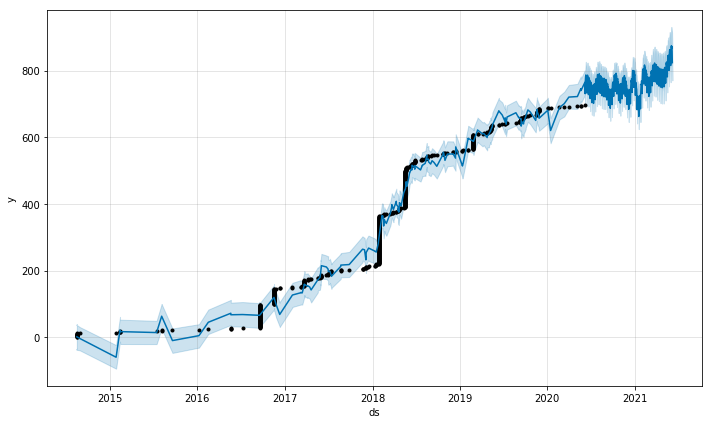

In [28]:
fig1 = m.plot(forecast)


In [29]:
fig2 = m.plot_components(forecast)


In [30]:
import plotly

In [31]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)